# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías necesarias para cargar, leer, graficar y analizar los datas

import pandas as pd
from math import factorial
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls=pd.read_csv("/datasets/megaline_calls.csv")

internet=pd.read_csv("/datasets/megaline_internet.csv")

messages=pd.read_csv("/datasets/megaline_messages.csv") 

plans=pd.read_csv("/datasets/megaline_plans.csv")

users=pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

Para este proyecto vamos a analizar 5 datas proporcionados por la compañia con la finalidad de poder hacer los analisis correcto y poder observar el comportamiento de nuestros clientes ante los paquetes proporcionados por dicha empresa y asi evaluar que paquete nos esta generando mejores ganancia y asi tomar las decisiones correctas para futuras campañas de marketing.

Como primer paso se revizaran todos los datas en busqueda de dats ausentes, duplicados y asi tener los datas de forma correcta para su analisis profundo posterior.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


En este data solo contamos con la informacion general de los 2 paquetes disponibles en la compañia y los costos y servicios incluidos en cada uno.


La información no contiene datos ausentes o duplicados (comparando con los datos explicados en la introducción), el único detalle es que en la columna "mb_per_month_included" los datos estan expresados en megabytes y no en gigabytes como se ofrecen en el paquete, este dato no se cambiará ya que en otros datas se expresa en megabites para el conteo de datos consumidos por usuario

## Corregir datos

No se han encontrado datos a corregir en este data aparentes.

In [5]:
print(plans.head())
plans.info()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios

print(users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

Para este data, el "id" esta en número enteros, se podria pasar a obj ya que son datos que identifican a los usuarios, al ser un dato cualitativo se puede hacer el cambio.


La columna "reg_date" tiene un formato a/m/d s se suguiere el cambio ya que el formato indicado no es el correcto, se encuentra como obj, se debe pasar a datetime.


Ya por último en la último columna "churn_date" se nos advirtio de los valores ausentes ya que estos indican que el usuario seguía activo en el momento de extraer el data para su analisis, se puede colocar un espacio vacío o 0 en vez de valores Nan, por comodidad visual, pero estos datos faltantes si tienen una justificación en el data y no deben ser eliminados.

### Corregir los datos

Se cambiara el tipo de formatos en las columnas necesarias.

Valores ausentes a espacio vacío o 0 para evitar confusiones a la hora de interpretar.

In [8]:
#cambio de tipo de dato con la funcion astype() para convertir a int a obj
users["user_id"]=users["user_id"].astype("str")

In [9]:
#cambio de tipo de dato para convertir a tipo fecha
users["reg_date"]=pd.to_datetime(users["reg_date"] , format="%Y-%m-%d")

In [10]:
#buscar filas duplicadas, solo para verificar el dato
print(users.duplicated().sum())

0


In [11]:
#imprime info y head para verificar los cambios
users.info()
print(users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB
  user_id first_name  last_name  age                                    city  \
0    1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1    1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2    1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3    1003   Reynaldo    Je

### Enriquecer los datos

Se agregará una columna para abreviar la ciudad para su analisis posterior.

In [12]:
#quitar MSA de los paises para mejor lectura de los datos
if users["city"].str.endswith(" MSA").mean() == 1:
    users["city"] = users["city"].str[:-4]
   

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
print(calls.head(10))


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


Los datos observados contienen errores similares a las tablas pasadas, tipo de datos incorrectos (datetime, objetc) y en este caso los minutos de llamada estan en decimales, y el cobro se hace por minutos totales enteros, se debe evaluar si redondearlos a numeros enteros no tendrá consecuencias posteriormente.

No existen aparentemente ausencia de datos.

### Corregir los datos

Se cambiará el tipo de dato de las columnas necesarias y se verificará si no existen duplicados.

In [15]:
#cambio de tipo de dato con la funcion astype() para convertir a int a obj
calls["user_id"]=calls["user_id"].astype("str")

In [16]:
#cambio de tipo de dato para convertir a tipo fecha
calls["call_date"]=pd.to_datetime(calls["call_date"] , format="%Y-%m-%d")

In [17]:
#buscar filas duplicadas, solo para verificar el dato
print(calls.duplicated().sum())

0


In [18]:
#llama info para corroborar los cambios 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

Creará una nueva columna filtrando el mes en que fueron realizadas las llamadas para su analisis posterior.

In [19]:
# Crear una nueva columna 'mes' que extraiga el mes de la columna 'calls_date'
calls['month'] = calls['call_date'].dt.month

In [20]:
calls.info()
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ MB
         id user_id  call_date  duration  month
0   1000_93    1000 2018-12-27      8.52     12
1  1000_145    1000 2018-12-27     13.66     12
2  1000_247    1000 2018-12-27     14.48     12
3  1000_309    1000 2018-12-28      5.76     12
4  1000_380    1000 2018-12-30      4.22     12


## Mensajes

In [21]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Imprime una muestra de datos para los mensajes
print(messages.head(30))

          id  user_id message_date
0   1000_125     1000   2018-12-27
1   1000_160     1000   2018-12-31
2   1000_223     1000   2018-12-31
3   1000_251     1000   2018-12-27
4   1000_255     1000   2018-12-26
5   1000_346     1000   2018-12-29
6   1000_386     1000   2018-12-30
7   1000_413     1000   2018-12-31
8   1000_502     1000   2018-12-27
9   1000_525     1000   2018-12-28
10  1000_567     1000   2018-12-25
11    1001_1     1001   2018-11-14
12    1001_2     1001   2018-08-17
13    1001_5     1001   2018-12-05
14    1001_7     1001   2018-11-28
15    1001_9     1001   2018-10-23
16   1001_10     1001   2018-09-01
17   1001_11     1001   2018-11-18
18   1001_17     1001   2018-12-11
19   1001_18     1001   2018-10-01
20   1001_19     1001   2018-09-13
21   1001_21     1001   2018-12-30
22   1001_23     1001   2018-08-23
23   1001_25     1001   2018-10-10
24   1001_30     1001   2018-12-14
25   1001_32     1001   2018-09-11
26   1001_34     1001   2018-10-09
27   1001_35     100

Como se ha visto anteriormente, algunas columnas vienen con un tipo de dato incorrecto y sin la presencia aparente de valores asuentes.

### Corregir los datos

Se corregira la columna ID para que sea un obj y meesage_date a tipo datetime.

Se corroborará la presencia de filas duplicadas.

In [23]:
#cambio de tipo de dato con la funcion astype() para convertir a int a obj
messages["user_id"]=messages["user_id"].astype("str")

In [24]:
#cambio de tipo de dato para convertir a tipo fecha
messages["message_date"]=pd.to_datetime(messages["message_date"] , format="%Y-%m-%d")

In [25]:
#buscar filas duplicadas, solo para verificar el dato
print(messages.duplicated().sum())

0


In [26]:
#llama info para corroborar los cambios 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

Se agregará una nueva columna con el mes filtrado para su analisis posterior.

In [27]:
# Crear una nueva columna 'month' que extraiga el mes de la columna 'messages_date'
messages['month'] = messages['message_date'].dt.month

In [28]:
messages.info()
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB
         id user_id message_date  month
0  1000_125    1000   2018-12-27     12
1  1000_160    1000   2018-12-31     12
2  1000_223    1000   2018-12-31     12
3  1000_251    1000   2018-12-27     12
4  1000_255    1000   2018-12-26     12


## Internet

In [29]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head(20))

          id  user_id session_date  mb_used
0    1000_13     1000   2018-12-29    89.86
1   1000_204     1000   2018-12-31     0.00
2   1000_379     1000   2018-12-28   660.40
3   1000_413     1000   2018-12-26   270.99
4   1000_442     1000   2018-12-27   880.22
5     1001_0     1001   2018-08-24   284.68
6     1001_3     1001   2018-12-09   656.04
7     1001_4     1001   2018-11-04    16.97
8    1001_10     1001   2018-11-27   135.18
9    1001_15     1001   2018-12-13   761.92
10   1001_16     1001   2018-10-28   501.53
11   1001_17     1001   2018-09-05   727.29
12   1001_24     1001   2018-09-05   622.03
13   1001_25     1001   2018-10-14   310.43
14   1001_26     1001   2018-09-17     0.00
15   1001_27     1001   2018-12-13   149.17
16   1001_28     1001   2018-10-17     0.00
17   1001_29     1001   2018-10-09  1067.99
18   1001_30     1001   2018-12-27   157.20
19   1001_33     1001   2018-09-27   236.40


Los datos estan en un formato incorrecto como en las tablas pasadas.
En la columna "mb_used" los datos estan representados en megabytes y no en giga, se dejará este datos para que cuadre con la tabla de plan y no perder datos del consumo de intener de los clientes al convertir los datos a enteros.

### Corregir los datos

Cambio de tipo de texto en las columnas necesarias.

Corrobar no existan filas duplicadas.

In [31]:
#cambio de tipo de dato con la funcion astype() para convertir a int a obj
internet["user_id"]=internet["user_id"].astype("str")

In [32]:
#cambio de tipo de dato para convertir a tipo fecha
internet["session_date"]=pd.to_datetime(internet["session_date"] , format="%Y-%m-%d")

In [33]:
#buscar filas duplicadas, solo para verificar el dato
print(internet.duplicated().sum())

0


In [34]:
#llama info para corroborar los cambios 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

Se creará una nueva columna filtrando el mes para analizar los mg usados por mes para su analisis popsterior.

In [35]:
# Crear una nueva columna 'month' que extraiga el mes de la columna 'session_date'
internet['month'] = internet['session_date'].dt.month

In [36]:
internet.info()
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.0+ MB
         id user_id session_date  mb_used  month
0   1000_13    1000   2018-12-29    89.86     12
1  1000_204    1000   2018-12-31     0.00     12
2  1000_379    1000   2018-12-28   660.40     12
3  1000_413    1000   2018-12-26   270.99     12
4  1000_442    1000   2018-12-27   880.22     12


## Estudiar las condiciones de las tarifas

In [37]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

Se agruparán los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.Ya que con esto el análisis por cliente será más detallado y exacto.

In [38]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#agrupan por id del ususario, contando el total de id de llamadas hechas. 
total_calls=calls.groupby(["user_id","month"])["id"].count()

In [39]:
total_calls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64

In [40]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#suman los minutos registrados en la duracion de las llamadas
duration_calls=calls.groupby(["user_id","month"])["duration"].sum()

In [41]:
duration_calls

user_id  month
1000     12       116.83
1001     8        171.14
         9        297.69
         10       374.11
         11       404.59
                   ...  
1498     12       324.77
1499     9        330.37
         10       363.28
         11       288.56
         12       468.10
Name: duration, Length: 2258, dtype: float64

In [42]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#cuenta el id de los mensajes hechos pos usuario
total_messages=messages.groupby(["user_id","month"])["id"].count()

In [43]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#suman lo mb usados por usuario registrados en su cuenta
total_internet=internet.groupby(["user_id","month"])["mb_used"].sum()

Se unieron todos los datos agrupados en un data para registar el consumo por cliente de todos los servicios totales por mes.

In [44]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#uso de concat para unir los agrupados,esto e sposible ya que siempre se agrupo por "user_id"
data_concat=pd.concat([total_calls, duration_calls,total_messages, total_internet], axis="columns")

In [45]:
data_concat=data_concat.reset_index()

In [46]:
data_concat

,user_id,month,id,duration,id,mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,NaN,23137.69
2289,1499,9,41.0,330.37,NaN,12984.76
2290,1499,10,53.0,363.28,NaN,19492.43
2291,1499,11,45.0,288.56,NaN,16813.83


In [47]:
#cambian los nombre de las columnas para mejor lectura del nuevo data
data_concat.columns=["user_id","month","total_calls_per_user","total_min_calls","total_messages_per_user", "total_mg_per_user"]
data_concat

,user_id,month,total_calls_per_user,total_min_calls,total_messages_per_user,total_mg_per_user
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,NaN,23137.69
2289,1499,9,41.0,330.37,NaN,12984.76
2290,1499,10,53.0,363.28,NaN,19492.43
2291,1499,11,45.0,288.56,NaN,16813.83


In [48]:
#crear un nuevo data con los datos del user_id para unirlo posteriormente a la info de las tarifas
user_resume=users[["user_id","plan","city"]]

In [49]:
user_resume

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV"
3,1003,surf,"Tulsa, OK"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA"
496,1496,surf,"New Orleans-Metairie, LA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA"


In [50]:
#une los datos de cada user con su id, el plan contratado y los sevicios incluidos según el plan.
data_merge=user_resume.merge(plans, left_on="plan", right_on="plan_name")
data_merge=data_merge.drop("plan_name", axis="columns")

In [51]:
data_merge

,user_id,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA",1000,30720,3000,70,7,0.01,0.01
1,1006,ultimate,"San Francisco-Oakland-Berkeley, CA",1000,30720,3000,70,7,0.01,0.01
2,1008,ultimate,"Orlando-Kissimmee-Sanford, FL",1000,30720,3000,70,7,0.01,0.01
3,1011,ultimate,"Cleveland-Elyria, OH",1000,30720,3000,70,7,0.01,0.01
4,1013,ultimate,"Knoxville, TN",1000,30720,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...
495,1494,surf,"New York-Newark-Jersey City, NY-NJ-PA",50,15360,500,20,10,0.03,0.03
496,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA",50,15360,500,20,10,0.03,0.03
497,1496,surf,"New Orleans-Metairie, LA",50,15360,500,20,10,0.03,0.03
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA",50,15360,500,20,10,0.03,0.03


In [52]:
# Añade la información de la tarifa
#uso merge para unir ambas datas
#une los datas donde se agruparon llamadas, msm, data de cada usuario con el plan que les corresponde y sus sevicios incluidos para calcular sus ingresos.
data_final = data_merge.merge(data_concat, left_on="user_id", right_on="user_id")

In [53]:
data_final.info()
data_final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  2293 non-null   object 
 1   plan                     2293 non-null   object 
 2   city                     2293 non-null   object 
 3   messages_included        2293 non-null   int64  
 4   mb_per_month_included    2293 non-null   int64  
 5   minutes_included         2293 non-null   int64  
 6   usd_monthly_pay          2293 non-null   int64  
 7   usd_per_gb               2293 non-null   int64  
 8   usd_per_message          2293 non-null   float64
 9   usd_per_minute           2293 non-null   float64
 10  month                    2293 non-null   int64  
 11  total_calls_per_user     2258 non-null   float64
 12  total_min_calls          2258 non-null   float64
 13  total_messages_per_user  1806 non-null   float64
 14  total_mg_per_user       

,user_id,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,total_calls_per_user,total_min_calls,total_messages_per_user,total_mg_per_user
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA",1000,30720,3000,70,7,0.01,0.01,12,16.0,116.83,11.0,1901.47
1,1006,ultimate,"San Francisco-Oakland-Berkeley, CA",1000,30720,3000,70,7,0.01,0.01,11,2.0,9.32,15.0,2068.37
2,1006,ultimate,"San Francisco-Oakland-Berkeley, CA",1000,30720,3000,70,7,0.01,0.01,12,9.0,54.79,139.0,32118.82
3,1008,ultimate,"Orlando-Kissimmee-Sanford, FL",1000,30720,3000,70,7,0.01,0.01,10,71.0,450.21,21.0,17106.99
4,1008,ultimate,"Orlando-Kissimmee-Sanford, FL",1000,30720,3000,70,7,0.01,0.01,11,63.0,422.81,37.0,23676.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA",50,15360,500,20,10,0.03,0.03,12,39.0,324.77,NaN,23137.69
2289,1499,surf,"Orlando-Kissimmee-Sanford, FL",50,15360,500,20,10,0.03,0.03,9,41.0,330.37,NaN,12984.76
2290,1499,surf,"Orlando-Kissimmee-Sanford, FL",50,15360,500,20,10,0.03,0.03,10,53.0,363.28,NaN,19492.43
2291,1499,surf,"Orlando-Kissimmee-Sanford, FL",50,15360,500,20,10,0.03,0.03,11,45.0,288.56,NaN,16813.83


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [54]:
#crear una función personalizada para calcular el precio a pagar mensual por usuario

def calcular_ingresos_mensuales(data_final):
    
    # Calcular el uso por encima del límite
    data_final["llamadas_excedentes"] = max(data_final["total_min_calls"] - data_final["minutes_included"])
    data_final["mensajes_excedentes"] = max(data_final["total_messages_per_user"] - data_final["messages_included"])
    data_final["datos_excedentes"] = max(data_final["total_mg_per_user"] - data_final["mb_per_month_included"])
    
    # Calcular ingresos por uso extra de cada servicio
    data_final["pagos_extras"] = (data_final["llamadas_excedentes"] * data_final["usd_per_minute"]) + \
                          (data_final["mensajes_excedentes"] * data_final["usd_per_message"]) + \
                          (data_final["datos_excedentes"] * data_final["usd_per_gb"])  # Cada uno con el valor correspondiente a su variable
    
    # Calcular ingresos totales
    data_final["pago_total"] = data_final["pagos_extras"] + data_final["usd_monthly_pay"]
    
    return data_final

In [55]:
# Calcula el ingreso mensual para cada usuario
#Crea un nueva columna con el costo total a pagar por mes por usuario

data_final['pago_total'] = calcular_ingresos_mensuales(data_final)

In [56]:
data_final


,user_id,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,total_calls_per_user,total_min_calls,total_messages_per_user,total_mg_per_user,llamadas_excedentes,mensajes_excedentes,datos_excedentes,pagos_extras,pago_total
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA",1000,30720,3000,70,7,0.01,0.01,12,16.0,116.83,11.0,1901.47,931.22,216.0,55571.59,389012.6022,1000
1,1006,ultimate,"San Francisco-Oakland-Berkeley, CA",1000,30720,3000,70,7,0.01,0.01,11,2.0,9.32,15.0,2068.37,931.22,216.0,55571.59,389012.6022,1006
2,1006,ultimate,"San Francisco-Oakland-Berkeley, CA",1000,30720,3000,70,7,0.01,0.01,12,9.0,54.79,139.0,32118.82,931.22,216.0,55571.59,389012.6022,1006
3,1008,ultimate,"Orlando-Kissimmee-Sanford, FL",1000,30720,3000,70,7,0.01,0.01,10,71.0,450.21,21.0,17106.99,931.22,216.0,55571.59,389012.6022,1008
4,1008,ultimate,"Orlando-Kissimmee-Sanford, FL",1000,30720,3000,70,7,0.01,0.01,11,63.0,422.81,37.0,23676.72,931.22,216.0,55571.59,389012.6022,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA",50,15360,500,20,10,0.03,0.03,12,39.0,324.77,NaN,23137.69,931.22,216.0,55571.59,555750.3166,1498
2289,1499,surf,"Orlando-Kissimmee-Sanford, FL",50,15360,500,20,10,0.03,0.03,9,41.0,330.37,NaN,12984.76,931.22,216.0,55571.59,555750.3166,1499
2290,1499,surf,"Orlando-Kissimmee-Sanford, FL",50,15360,500,20,10,0.03,0.03,10,53.0,363.28,NaN,19492.43,931.22,216.0,55571.59,555750.3166,1499
2291,1499,surf,"Orlando-Kissimmee-Sanford, FL",50,15360,500,20,10,0.03,0.03,11,45.0,288.56,NaN,16813.83,931.22,216.0,55571.59,555750.3166,1499


In [57]:
#convertir la columna de del pago final en int para su uso posterior en calculos y graficas
data_final["pago_total"]=data_final["pago_total"].astype("int")

## Estudia el comportamiento de usuario

Analizaremos el comportamiento de los usuarios ya con el cálculo de su comportamiento en relación a sus planes, se añadirán gráficas que ayuden a explicar el comportamiento de los usuarios comparando las tarifas para conocer cual es más rentable.
Compararemos en todo momento ambas tarifas para conocer cual nos deja mejores beneficios como empresa.

### Llamadas

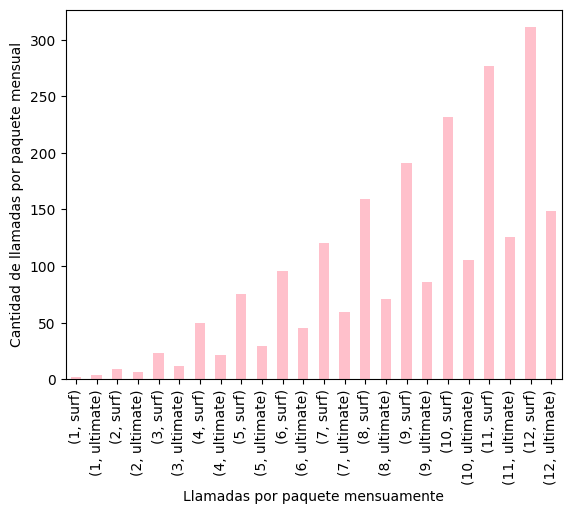

In [58]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#se agrupan pos plan y mes para su visualiacion en las graficas
final_calls=data_final.groupby(["month","plan"])["total_min_calls"].count()
#manda a visualizar la graficas con ambos planes
final_calls.plot(x="plan", xlabel="Llamadas por paquete mensuamente",ylabel="Cantidad de llamadas por paquete mensual", kind="bar", color="pink")

plt.show()

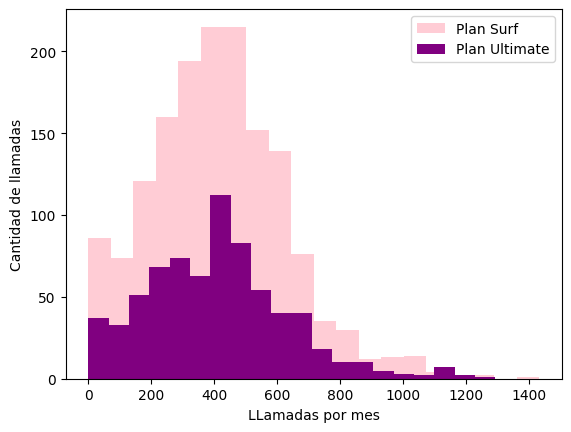

In [59]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#se filtra cada plan con el numero total de llamas hechas y se realiza el codigo de histograma
data_final[data_final["plan"]== "surf"]["total_min_calls"].plot(kind= "hist", bins=20, alpha=0.8, color= "pink")
data_final[data_final["plan"]== "ultimate"]["total_min_calls"].plot(kind= "hist", bins=20, color= "purple")

#añade informacion al gráfico para mejor visualización
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.xlabel("LLamadas por mes")
plt.ylabel("Cantidad de llamadas")
plt.show()

Se buscará analizar l amedia y la varianza de los usuarios para verificar si ambos planes se comportan de manera similar en cuanto a las llamadas realizadas y analizar su comportamiento.

In [60]:
# Calcula la media y la varianza de la duración mensual de llamadas.
calls_mean= data_final["total_min_calls"].mean()
calls_var= np.var(data_final["total_min_calls"])

In [61]:
print("La media de las llamadas es:" , calls_mean)
print("La varianza de las llamadas es:", calls_var)

La media de las llamadas es: 411.4925863596103
La varianza de las llamadas es: 48067.00576337274


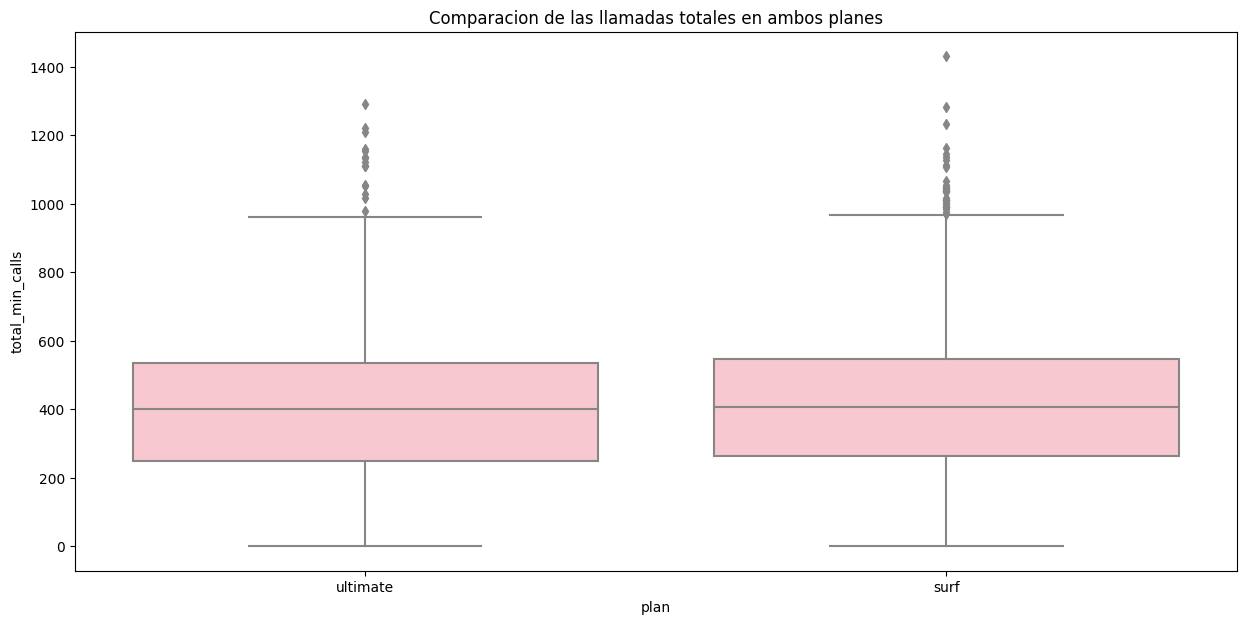

In [62]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(15,7))
sns.boxplot(data=data_final, x="plan", y="total_min_calls", color="pink")
plt.title("Comparacion de las llamadas totales en ambos planes")
plt.show()

Conclusiones:

Los usuarios del plan surf tienden a realizar mas llamadas si comparamos su uso mensualmente en las gráficas de barras.
Ambos grupos tienen un patron muy similar en el uso solo varia por la mayor demanda del servicio por los usuraios del plan surf.
Al analizar la caja vemos que sus valores son muy similares, los datos pasados pueden estarse viendo afectados por todos los valores atipicos que presentan ambos grupos. Pero en su promedio ambos grupos se comportan de manera muy similar.

### Mensajes

<AxesSubplot:xlabel='Mensajes realizados mensualmente por plan'>

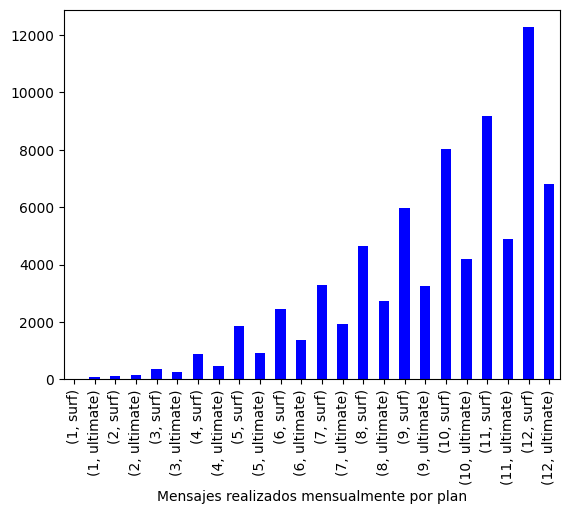

In [63]:
# Compara la cantidad promedio de mensajes por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#crea un filtro para el mes y el plan y analizar los mensajes totales realizados mensualmente por ambos grupos.
final_msm=data_final.groupby(["month","plan"])["total_messages_per_user"].sum()
#manda a llamar el grafico de barras para ambos grupos a analizar
final_msm.plot(x="plan", xlabel="Mensajes realizados mensualmente por plan", kind="bar", color="blue")

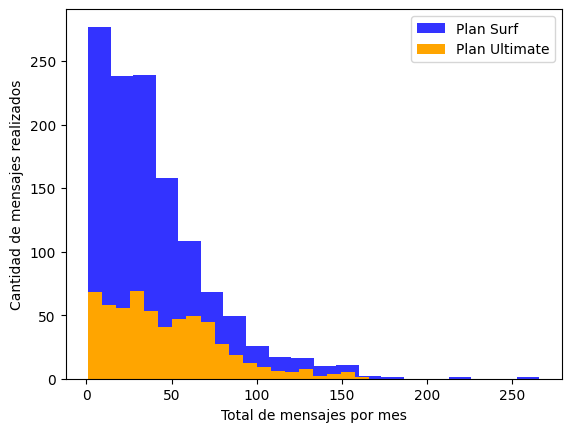

In [64]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#se crea un filtro para buscar los datos por plan sobre los mensajes y se crea el histograma para cada plan
data_final[data_final["plan"]== "surf"]["total_messages_per_user"].plot(kind= "hist", bins=20, alpha=0.8, color= "blue")
data_final[data_final["plan"]== "ultimate"]["total_messages_per_user"].plot(kind= "hist", bins=20, color= "orange")

#añade informacion al gráfico para mejor visualización de ambos planes en la misma gráfica
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.xlabel("Total de mensajes por mes")
plt.ylabel("Cantidad de mensajes realizados")
plt.show()

In [65]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.
msm_mean= data_final["total_messages_per_user"].mean()
msm_var= np.var(data_final["total_messages_per_user"])

In [66]:
print("La media de los mensajes es:" , msm_mean)
print("La varianza de los mensajes es:", msm_var)

La media de los mensajes es: 42.110188261351055
La varianza de los mensajes es: 1096.5210811384227


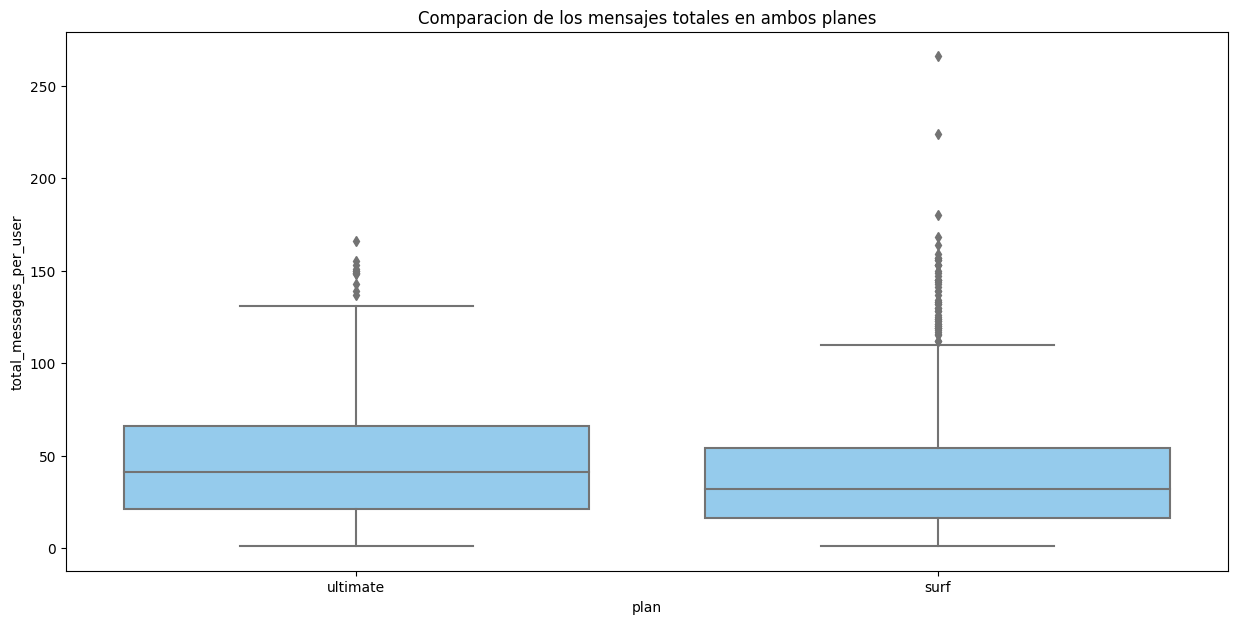

In [67]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mmensajes
plt.figure(figsize=(15,7))
sns.boxplot(data=data_final, x="plan", y="total_messages_per_user", color="lightskyblue")
plt.title("Comparacion de los mensajes totales en ambos planes")
plt.show()

Conclusiones:

Al igual que con las llamadas lo usuarios del plan Surf realian mas mensajes que aquellos usuarios en el plan Ultimate.
Ambos usuarios nuevamente tienen una tendencia muy similar en su uso
La grafica de caja nos indica la militud en sus cifras, aunque el plan Ultimate mueste un Q3 mayor al plan surf, es importante considerar los valores atipicos del plan surf que estan en mayor cantidad y puedan estar afectando nuestra grafica para su comparacion entre ambos planes.

### Internet

<AxesSubplot:xlabel='Uso mg por usuario'>

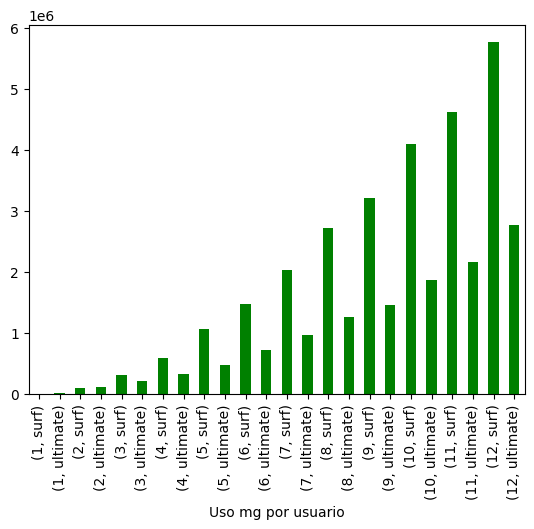

In [68]:
# Compara la cantidad promedio de internet usado por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#fcrea un filtro para separar por mes y plan el uso de los mg de los usuarios y poder graficarlos
final_int=data_final.groupby(["month","plan"])["total_mg_per_user"].sum()
#manda a crear la grafica con ambos planes dentro del mismo grafico
final_int.plot(x="plan", xlabel="Uso mg por usuario", kind="bar", color="green")

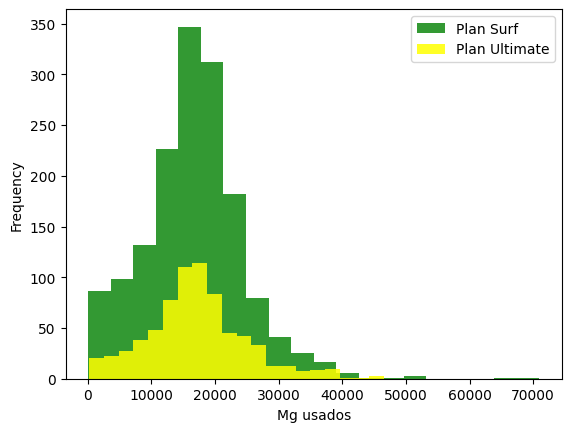

In [69]:
# Compara el internet mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#crea un filtro para cada plan y se manda la orden de crear un histograma para cada uno
data_final[data_final["plan"]== "surf"]["total_mg_per_user"].plot(kind= "hist", bins=20, alpha=0.8, color= "green")
data_final[data_final["plan"]== "ultimate"]["total_mg_per_user"].plot(kind= "hist", bins=20, alpha= 0.85, color= "yellow")

#añade informacion al gráfico para mejor visualización
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.xlabel("Mg usados")
plt.show()

In [70]:
# Calcula la media y la varianza de la cantidad mensual de internet.
int_mean= data_final["total_mg_per_user"].mean()
int_var= np.var(data_final["total_mg_per_user"])

In [71]:
print("La media de los gb usados es:" , int_mean)
print("La varianza de los gb usados es:", int_var)

La media de los gb usados es: 16882.197501097933
La varianza de los gb usados es: 61906313.93878115


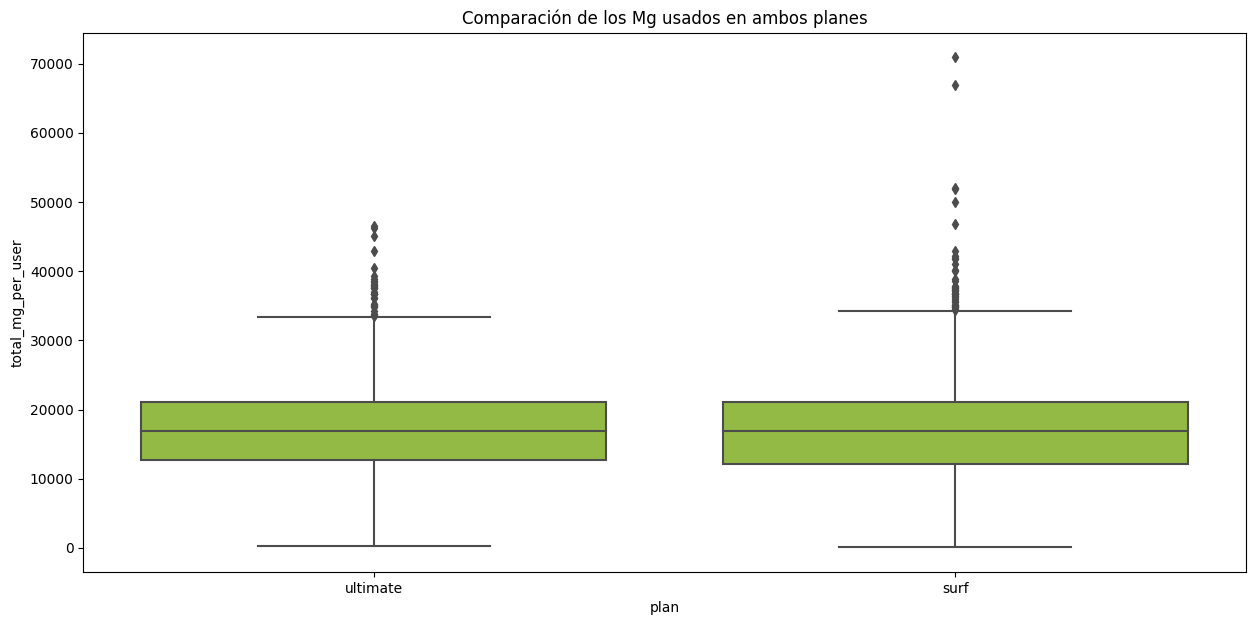

In [72]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de internet
plt.figure(figsize=(15,7))
sns.boxplot(data=data_final, x="plan", y="total_mg_per_user", color="yellowgreen")
plt.title("Comparación de los Mg usados en ambos planes")
plt.show()

Conclusion:
Nuevamente los usuarios del plan Surf son aquellos que nos muestran mayor uso de datos en comparacion con ambos grupos.
Ambos grupos tienen un atron de uso muy similar visto en el histograma, solo con frecuencias difernetes.
En la graica de caja podemos observar que ambos planes tienen datsos parcticamente similares, lo que ha concordados con las llamadas y los mensajes, lo que nos habla de que aparentenete no existen diferencias entre ambos grupos hasta el moemnto.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<AxesSubplot:xlabel='pago total por plan', ylabel='cantidad de usuarios que pagaron'>

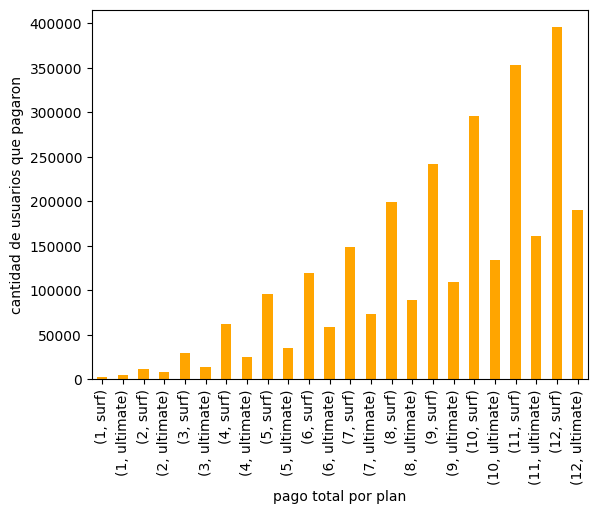

In [73]:
# Compara la cantidad promedio de ingreso por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
#se agrupa en mes y plan para poder analizar el pago de ambos planes
final_ing=data_final.groupby(["month","plan"])["pago_total"].sum()
#manda a graficar ambos planes en la misma grafica
final_ing.plot(x="plan", xlabel="pago total por plan", ylabel="cantidad de usuarios que pagaron", kind="bar", color="orange")

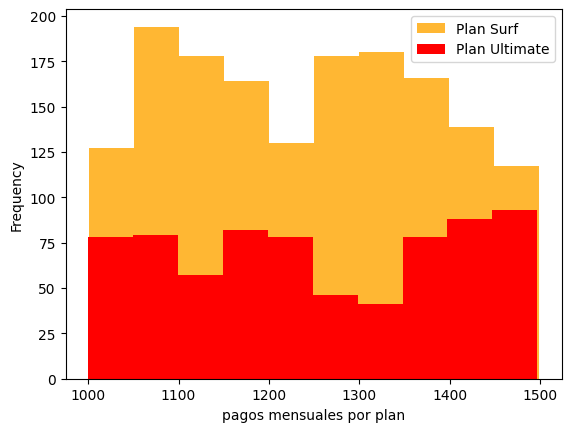

In [74]:
# Compara el pago total mensual. Traza un histograma.
#crea un filtro para separar por planes y cada uno tenga su histograma
data_final[data_final["plan"]== "surf"]["pago_total"].plot(kind= "hist", alpha=0.8, color= "orange")
data_final[data_final["plan"]== "ultimate"]["pago_total"].plot(kind= "hist", color= "red")

#añade informacion al gráfico para mejor visualización
plt.legend(["Plan Surf", "Plan Ultimate"])
plt.xlabel("pagos mensuales por plan")
plt.show()

In [75]:
# Calcula la media y la varianza del ingreso mensual de cada plan.
total_mean= data_final["pago_total"].mean()
total_var= np.var(data_final["pago_total"])

In [76]:
print("La media de los gb usados es:" , total_mean)
print("La varianza de los gb usados es:", total_var)

La media de los gb usados es: 1246.0758831225469
La varianza de los gb usados es: 20454.92926137666


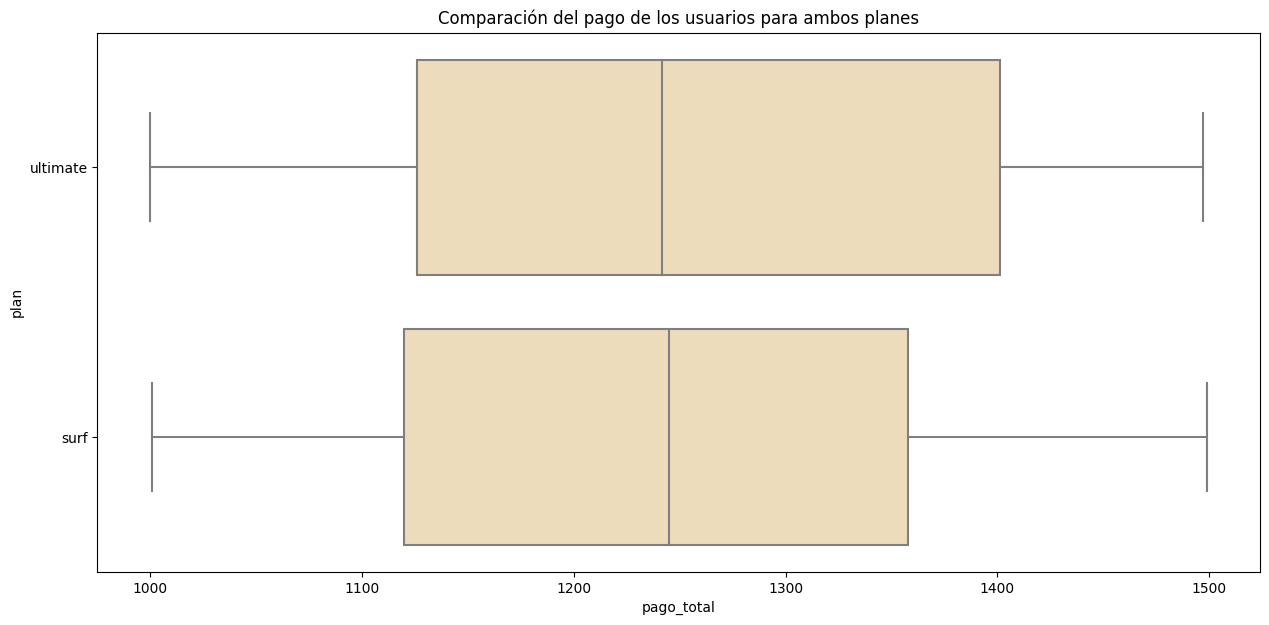

In [77]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de ingreso por plan
plt.figure(figsize=(15,7))
sns.boxplot(data=data_final, x="pago_total", y="plan", color="wheat")
plt.title("Comparación del pago de los usuarios para ambos planes")
plt.show()

Conclusion:
A diferencia de las otras graficas el pago total de los usuarios por plan es muy diferente.
Los usuarios del plan Surf son aquellos que tiene mayor pago, esto no significa que sea mejor plan pues ese pago extra puede ser por sobrepasar la cantidad de mensajes, llamadas o mg limites.
No existe un patron en relacion a ambos planes con el pago.
La caja nos muestra que los usuarios de Surf si tienen mayores pagos. Se debe realiar una comparacion de ambos planes en relacion de los pagos extras para conocer si esa es el motivo de estas graficas.

## Prueba las hipótesis estadísticas

Para comparar los ingresos de los usuarios en los diferentes planes, podemos usar una prueba estadística adecuada para comparar las medias de ambos grupos. En este caso, podemos utilizar la prueba t de Student.

Interpretaremos los resultados para determinar si hay una diferencia significativa en los ingresos entre los planes.

H0: No hay diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

H1: Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf no generan los mismos ingresos


Definine un alpha= 0.05

In [80]:
# Prueba las hipótesis
# Separar los datos por plan para su analisis
surf = data_final[data_final['plan'] == 'surf']['pago_total']
ultimate= data_final[data_final['plan'] == 'ultimate']['pago_total']

#coloca un nivel de significancia estadistica critica del 5%
alpha= 0.05

results=st.ttest_ind(surf, ultimate)

#imrime el valor p
print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la Ho")
    
else:
    print("No se rechaza la Ho")

Valor p: 0.10040153974445241
No se rechaza la Ho


Ahora se probara la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

H0: No hay diferencia entre los ingresos promedio procedentes de Ny-NJ y los otros estados.

H1: Los ingresos promedio procedentes de los usuarios de NY-NJ no generan los mismos ingresos en comparación con los ingresos de otros estados.

Alpha=0.05


In [86]:
# Prueba las hipótesis
#filtro para los estados seleccionados
filtro_estados = (data_final['city'].str.contains("NY") | data_final['city'].str.contains("NJ"))
estados_usa= data_final[~filtro_estados]["pago_total"]


#coloca un nivel de significancia estadistica critica del 5%
alpha= 0.05

#prueba t-test
results=st.ttest_ind(surf, ultimate)

#imrime el valor p
print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la Ho")
    
else:
    print("No se rechaza la Ho")


Valor p: 0.10040153974445241
No se rechaza la Ho


## Conclusión general

Los planes Surf Y Ultimate generan diferentes fuentes de ingreso. Lo que nos permite rechazar la Ho, ya que los graficos nos demouestran las diferencias significativas en cada ambito analizado.


Aunque el plan Surf nos muestra mayores ingresos se debe analizar el origen de este, encuentro la teoria de que esto esta sucediendo a que es más facil exceder los servicios que da el plpan, haciendo que los usuarios tengan que pagar siempre más por su paquete telefonico. De esta teoria podrían analiarse potenciales clientes que se puedan pasar al plan ULTIMATE, esto con el objetivo de mejorar el servicio y asi poder observar que plan es en realdad el que mejores ingresos da sin contar con los cargos extra generados por usuario.

Queda obsrvado que ambos planes en casi toda categoría tienen la misma tendencia de uso, lo que nos lleva a nuevas preguntas sobre si los clientes podrian mejorar sus planes y así tener mayor cantidad de usuarios en Ultimate y tener esos ingresos mejor contabilizados.